In [ ]:
# Perform Data preprocessing, also plotted some graphes which were necessary for data visualization.
# Chossed "energy" as target variable and other variables like "serving_size","protein","total_fat","sat_fat","trans_fat","chol","carbs","total_sugar","added_sugar","sodium" as features.
# Also tried to predict energy using Sklearn and Statsmodels libraries.

In [1]:
import os
import sys
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# df = pd.read_csv('mcd.csv')

In [3]:
!gdown https://drive.google.com/file/d/168kVDwDZEiwqzE_J-N36L02GCJBElHWm/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=168kVDwDZEiwqzE_J-N36L02GCJBElHWm
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/168kVDwDZEiwqzE_J-N36L02GCJBElHWm/view?usp=sharing
To: /content/view?usp=sharing
87.3kB [00:00, 8.92MB/s]


In [4]:
df = pd.read_csv('mcd.csv')

In [5]:
df.head()

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
0,Black Coffee®,200ml,NaN,NaN,No Allergens,6.80,0.00,0.00,0.00,0.00,0.00,1.70,0.00,0.00,0.00,Perfectly brewed for any time of the day.
1,Butter Chicken Grilled Burger,153g,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,4.65,0.00,31.93,39.76,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142g,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,8.29,0.00,6.62,44.12,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...
3,Cheesy Fries,150g,"Salted Fries, Smoky Chipotle Sauce","Hi, it’s cheese on this side!",Milk,453.92,7.19,21.10,10.64,0.59,3.89,41.94,0.95,0.40,430.79,The all-time favourite fries with a generous d...
4,Chicken Maharaja Mac®,296g,"Maharaja bun crown, Haberno sauce, Shredded le...",A royal treat.,"Cereal containing gluten, Milk, Soya",689.12,34.00,36.69,10.33,0.25,81.49,55.39,8.92,6.14,1854.71,\n A double-dec...


In [6]:
df.shape

(42, 16)

In [7]:
df.size

672

In [8]:
df.describe()

,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,327.503810,10.251667,13.980095,6.457143,0.125238,21.062619,39.231857,13.296905,9.305714,474.297857
std,206.453133,10.042711,11.748440,5.208211,0.111994,28.125409,21.680327,14.939201,12.297709,472.896404
min,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000,0.000000,0.000000,0.000000
25%,176.622500,2.832500,5.790000,3.670000,0.060000,2.840000,23.632500,2.922500,1.080000,85.770000
50%,306.245000,6.335000,11.375000,5.065000,0.100000,6.585000,39.305000,8.565000,5.175000,309.770000
75%,401.737500,15.340000,18.807500,8.125000,0.175000,31.740000,51.207500,17.287500,12.902500,709.437500
max,832.670000,47.600000,46.900000,21.110000,0.590000,115.000000,117.780000,66.930000,55.160000,1854.710000


In [9]:
df.describe(include='object')

,name,serving_size,ingredients,tag,allergy,description
count,42,42,36,36,42,42
unique,31,40,26,24,9,31
top,Chicken McNuggets®,91.79g,Chicken bites,Each bite is better than the last.,"Cereal containing gluten, Milk, Soya","Bite-sized pieces of breaded, boneless chicken..."
freq,4,2,4,4,14,4


In [10]:
df.sample(2)

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
29,Our World Famous Fries®,109g,Potato and salt,The legend among legends.,No Allergens,317.92,4.79,14.70,7.04,0.11,1.09,38.34,0.55,0.00,216.79,"The crisp, craveable, fan favourite: our World..."
12,Fillet-O-Fish®,136g,"Steamed regular bun, Chunky tartar mayo, Fish ...",This one's a great catch.,"Cereal containing gluten, Milk, Egg, Fish, Soya",348.11,15.44,14.16,5.79,0.21,32.83,38.85,5.58,3.54,530.54,Made with Alaskan Pollock sourced from sustain...


In [11]:
df.dtypes

name             object
serving_size     object
ingredients      object
tag              object
allergy          object
energy          float64
protein         float64
total_fat       float64
sat_fat         float64
trans_fat       float64
chol            float64
carbs           float64
total_sugar     float64
added_sugar     float64
sodium          float64
description      object
dtype: object

In [12]:
df.isna().sum()

name            0
serving_size    0
ingredients     6
tag             6
allergy         0
energy          0
protein         0
total_fat       0
sat_fat         0
trans_fat       0
chol            0
carbs           0
total_sugar     0
added_sugar     0
sodium          0
description     0
dtype: int64

In [13]:
# We can see, that there are missing values, in the following columns: ingredients and tag, which is very low, so we can drop them.

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

name            0
serving_size    0
ingredients     0
tag             0
allergy         0
energy          0
protein         0
total_fat       0
sat_fat         0
trans_fat       0
chol            0
carbs           0
total_sugar     0
added_sugar     0
sodium          0
description     0
dtype: int64

In [16]:
df['name'].unique()

array(['Butter Chicken Grilled Burger', 'Butter Paneer Grilled Burger',
       'Cheesy Fries', 'Chicken Maharaja Mac®', 'Chicken McNuggets®',
       'Dosa Masala Burger®', 'Fillet-O-Fish®', 'McAloo Tikki Burger®',
       'McChicken®', 'McEgg®', 'McFlurry (Choco Crunch)®',
       'McFlurry (Oreo)®', 'McSpicy Chicken®', 'McSpicy Paneer®',
       'McSwirl Chocolate®', 'McVeggie®', 'Our World Famous Fries®',
       'Pizza McPuff®', 'Soft Serve Cone®', 'Spicy Chicken Wrap®',
       'Spicy Paneer Wrap®', 'Sundae (Chocolate Brownie)®',
       'Sundae (Chocolate)®', 'Sundae (Strawberry)®', 'Veg Maharaja Mac®',
       'Veg Surprise Burger'], dtype=object)

In [17]:
df['name'].nunique()

26

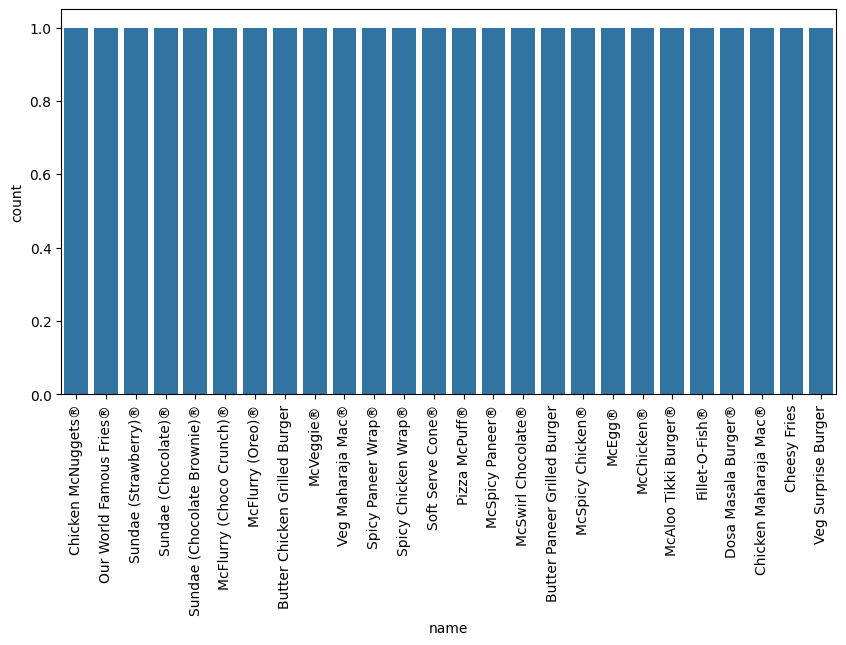

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df['name'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [19]:
ingredients_word = ""
stopwords = set(STOPWORDS)
for val in df.ingredients:
    val = str(val)
    tokens  = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    ingredients_word +="".join(tokens)+""
wc_ingredients = WordCloud(width=800, height=800,background_color = 'white',stopwords = stopwords, min_font_size = 10).generate(ingredients_word)

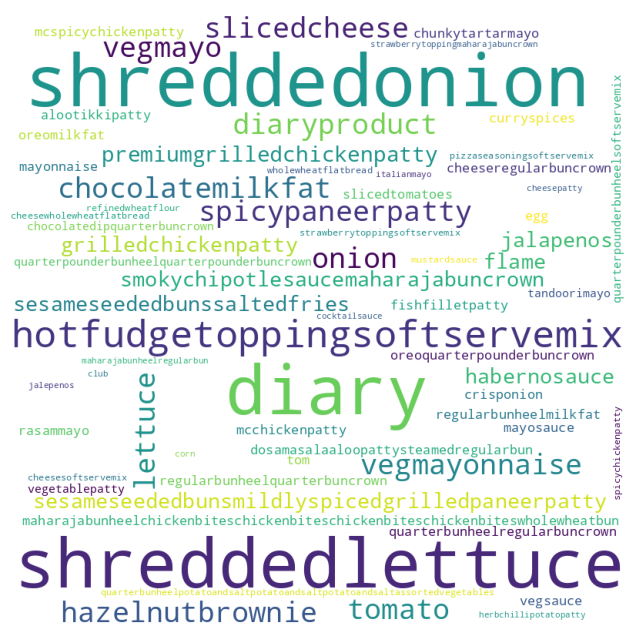

In [20]:
plt.figure(figsize=(15,8))
plt.imshow(wc_ingredients)
plt.axis("off")
plt.show()

In [21]:
for i in df.columns:
    print(i, df[i].nunique())

name 26
serving_size 34
ingredients 26
tag 24
allergy 9
energy 36
protein 35
total_fat 36
sat_fat 36
trans_fat 22
chol 35
carbs 36
total_sugar 36
added_sugar 27
sodium 36
description 26


In [22]:
# We can see here the name of the product with how many ingredients is been used in the single product
# here we have Chicken McNuggets with the 4 item in it

In [23]:
df.groupby('name')['ingredients'].count()

name
Butter Chicken Grilled Burger    1
Butter Paneer Grilled Burger     1
Cheesy Fries                     1
Chicken Maharaja Mac®            1
Chicken McNuggets®               4
Dosa Masala Burger®              1
Fillet-O-Fish®                   1
McAloo Tikki Burger®             1
McChicken®                       1
McEgg®                           1
McFlurry (Choco Crunch)®         2
McFlurry (Oreo)®                 2
McSpicy Chicken®                 1
McSpicy Paneer®                  1
McSwirl Chocolate®               1
McVeggie®                        1
Our World Famous Fries®          3
Pizza McPuff®                    1
Soft Serve Cone®                 1
Spicy Chicken Wrap®              1
Spicy Paneer Wrap®               1
Sundae (Chocolate Brownie)®      2
Sundae (Chocolate)®              2
Sundae (Strawberry)®             2
Veg Maharaja Mac®                1
Veg Surprise Burger              1
Name: ingredients, dtype: int64

In [24]:
# Checking out liers in the dataset

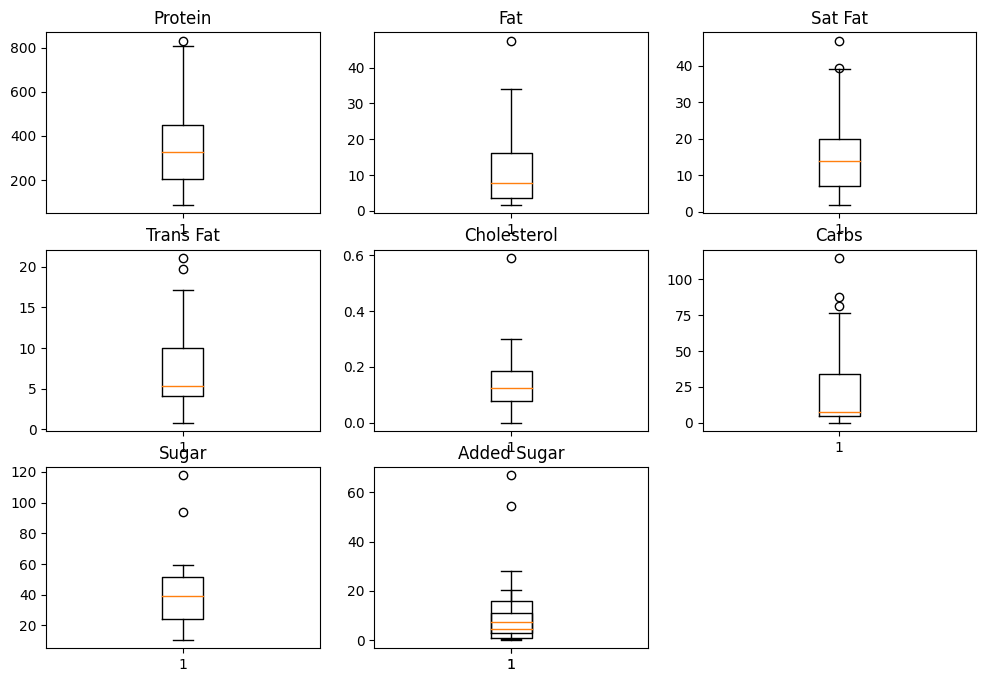

In [25]:
plt.figure(figsize=(12,8))

plt.subplot(331)
plt.title('Energy')
plt.boxplot(df['energy'])

plt.title('Protein')
plt.subplot(332)
plt.boxplot(df['protein'])

plt.title('Fat')
plt.subplot(333)
plt.boxplot(df['total_fat'])


plt.title('Sat Fat')
plt.subplot(334)
plt.boxplot(df['sat_fat'])


plt.title('Trans Fat')
plt.subplot(335)
plt.boxplot(df['trans_fat'])


plt.title('Cholesterol')
plt.subplot(336)
plt.boxplot(df['chol'])


plt.title('Carbs')
plt.subplot(337)
plt.boxplot(df['carbs'])


plt.title('Sugar')
plt.subplot(338)
plt.boxplot(df['total_sugar'])


plt.title('Added Sugar')
plt.subplot(338)
plt.boxplot(df['added_sugar'])

plt.show()

In [26]:
# Analysing the Energies from the Product

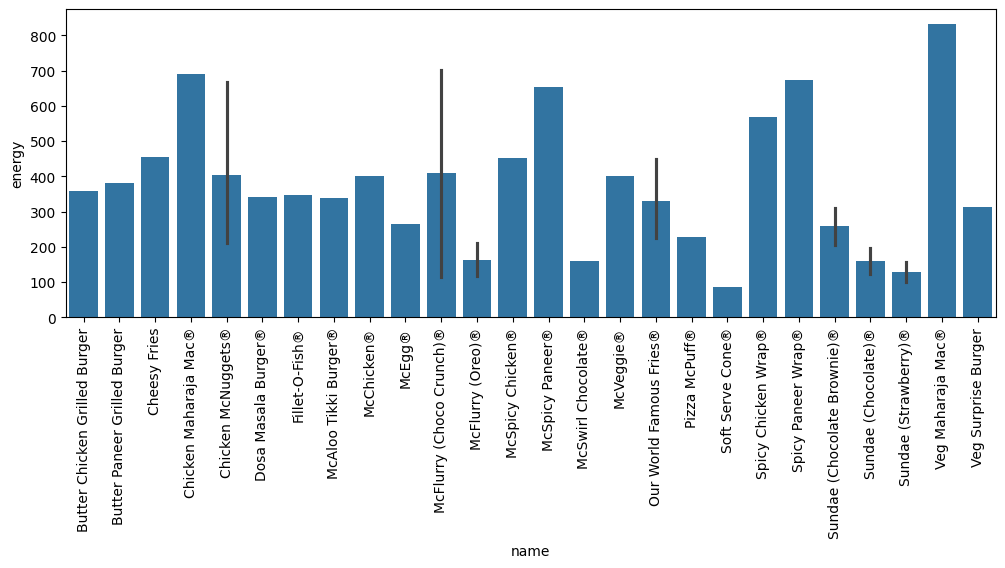

In [27]:
plt.figure(figsize=(12,4))
sns.barplot(x='name', y='energy', data=df)
plt.xticks(rotation=90)
plt.show()

In [28]:
# We can see From the graph, the veg Maharaja Mac have the highest consuption of the energy, followed by the Chicken Maharaja mac
# this might can be happening this much Energy just because it has a maharaja size pack!, which is big intake product comes with the most of the energy

## Let's Analyise the serving size of the product


In [29]:
# Note every serving size is in the grams

In [30]:
df['serving_size'] = df["serving_size"].str.replace('g',' ')

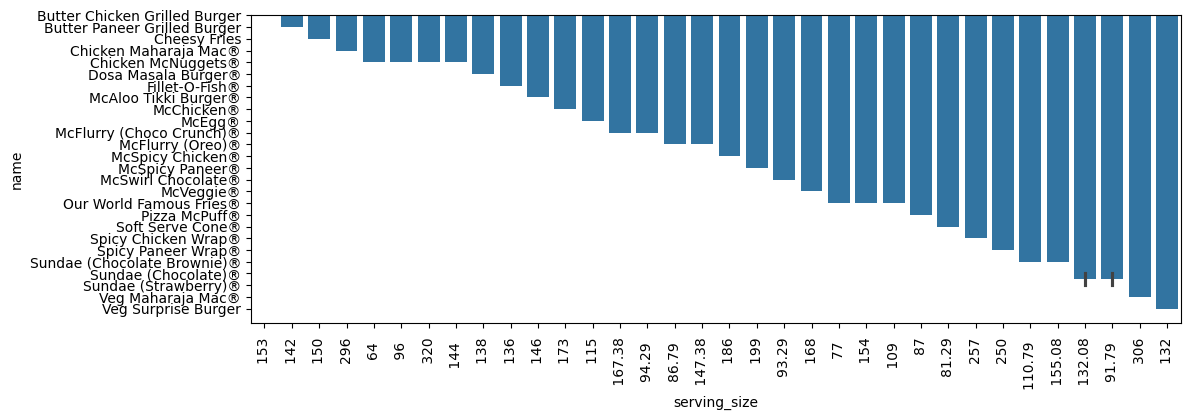

In [31]:
plt.figure(figsize=(12,4))
sns.barplot(data=df, x="serving_size", y ="name")
plt.xticks(rotation=90)
plt.show()

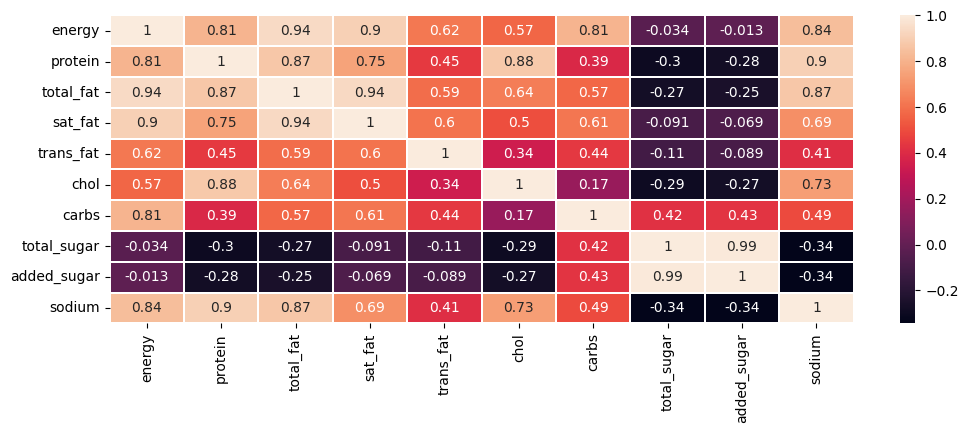

In [32]:
plt.figure(figsize=(12,4))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,linewidths=0.1,annot =True)
plt.show()

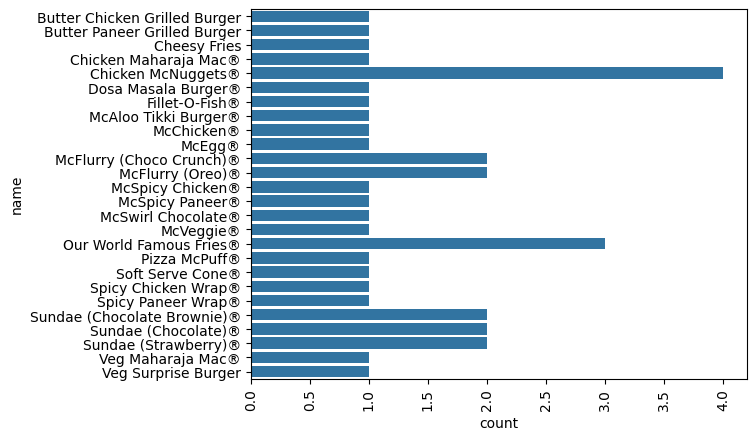

In [33]:
sns.countplot(df['name'])
plt.xticks(rotation=90)
plt.show()

In [34]:
# The most of the products are Chicken McNuggets which is been sold across the market from Mcdonald's

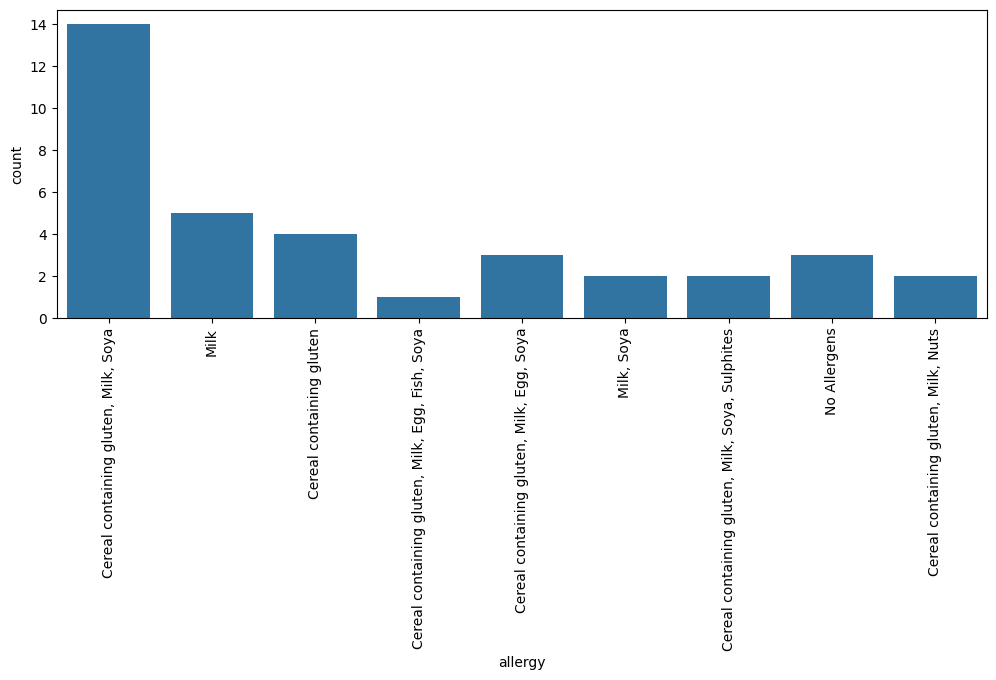

In [35]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='allergy')
plt.xticks(rotation=90)
plt.show()

In [36]:
# from the analysi came from the graph comes out to be the most allergy contains Cereal containing gluten, Milk, Soya

# Let's create a model for the **Linear Regression**
## Taking the Energy as a y variable for the analysis to predict from the rest of the features.
### Lets analyse the consumption of product and find how much energey should we take while eating the product

In [37]:
df[:2]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
1,Butter Chicken Grilled Burger,153,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,4.65,0.0,31.93,39.76,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,8.29,0.0,6.62,44.12,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...


In [38]:
y = df['energy']

In [39]:
x = df[['serving_size','protein', 'total_fat','sat_fat','trans_fat','chol','carbs','total_sugar','added_sugar','sodium']]

In [40]:
print(x.shape)
print(y.shape)

(36, 10)
(36,)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 10)
(8, 10)
(28,)
(8,)


In [44]:
model = LinearRegression()

In [45]:
model = model.fit(x_train, y_train)
model

LinearRegression()

In [46]:
model.score(x_train, y_train)

0.998258798340007

In [47]:
# The Linear Regression model goves almost 99% fo the accuracy from the table training and testing data!
# the Accuracy comes out to be more beacuse the training data set is very low, it might get differ from the original source
# if the data were given in terms of more and more

In [48]:
r2_score(y_test, model.predict(x_test))

0.9979031335518475

In [49]:
model.coef_

array([-1.52274211e-01,  3.35599326e+00,  9.35324748e+00, -6.53880828e-01,
        1.10434942e+02,  4.67068199e-02,  4.32913979e+00,  2.88948351e-01,
       -9.10260522e-01,  8.26689067e-03])

In [50]:
model.intercept_

2.683657126646665

In [51]:
y_pred = model.predict(x_test)

In [52]:
y_pred

array([331.38278234, 694.88782298, 576.73236143, 194.94847336,
       202.66396426, 119.38887466, 223.71488305, 272.8595363 ])

In [53]:
y_test

41    313.44
19    703.17
32    567.19
36    197.45
22    209.39
37    121.64
27    224.59
18    265.00
Name: energy, dtype: float64

In [54]:
# Let's Analyse the Actual and Predicted values comes out to be from the Learmign Process

In [55]:
prediction = pd.DataFrame(y_pred, columns=['value'])
prediction.rename(columns={'value':'predicted'}, inplace=True)

In [56]:
prediction

,predicted
0,331.382782
1,694.887823
2,576.732361
3,194.948473
4,202.663964
5,119.388875
6,223.714883
7,272.859536


In [57]:
y_test

41    313.44
19    703.17
32    567.19
36    197.45
22    209.39
37    121.64
27    224.59
18    265.00
Name: energy, dtype: float64

In [58]:
actual = pd.DataFrame(y_test).reset_index(drop=True)
actual.rename(columns={'energy':'Actual'}, inplace=True)
actual

,Actual
0,313.44
1,703.17
2,567.19
3,197.45
4,209.39
5,121.64
6,224.59
7,265.00


In [59]:
predicted_values = pd.merge(actual, prediction, left_index=True, right_index=True)
predicted_values

,Actual,predicted
0,313.44,331.382782
1,703.17,694.887823
2,567.19,576.732361
3,197.45,194.948473
4,209.39,202.663964
5,121.64,119.388875
6,224.59,223.714883
7,265.00,272.859536


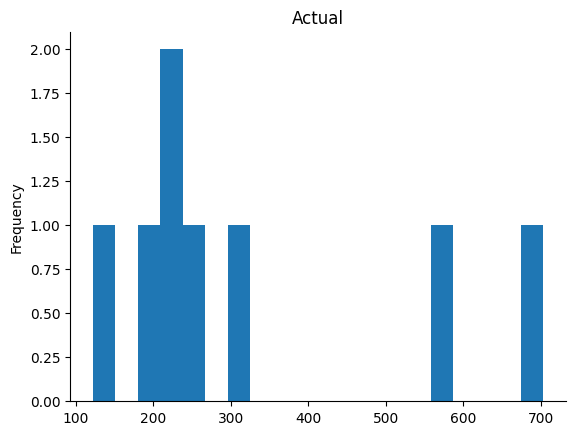

In [60]:
predicted_values['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

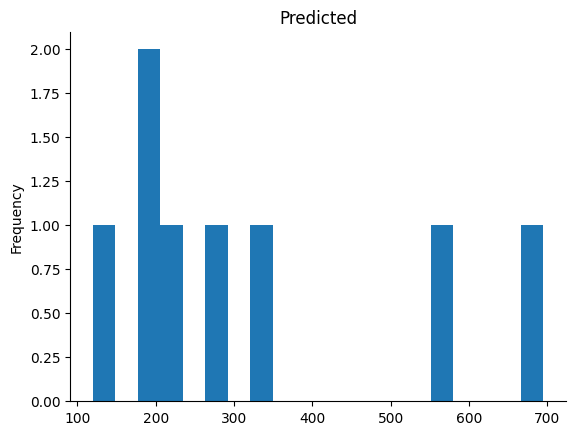

In [61]:
predicted_values['predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Actual vs Predicted')

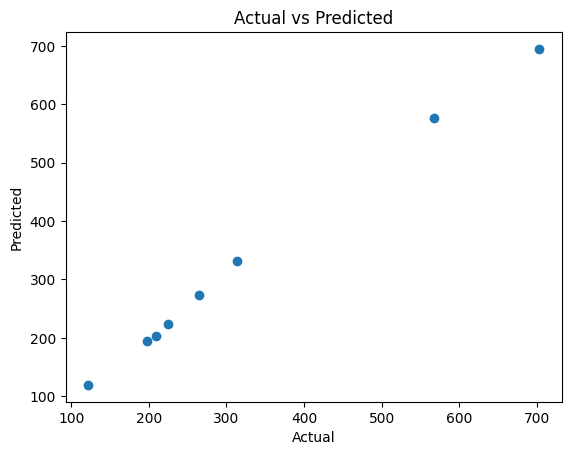

In [62]:
plt.scatter(predicted_values['Actual'], predicted_values['predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

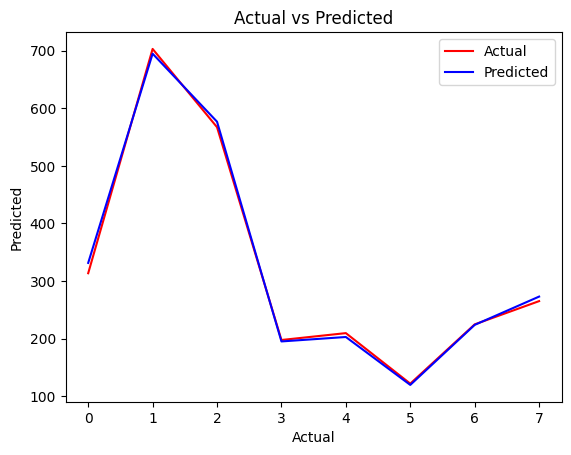

In [63]:
plt.plot(predicted_values['Actual'], color='red')
plt.plot(predicted_values['predicted'], color='blue')
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [64]:
df[:2]

,name,serving_size,ingredients,tag,allergy,energy,protein,total_fat,sat_fat,trans_fat,chol,carbs,total_sugar,added_sugar,sodium,description
1,Butter Chicken Grilled Burger,153,"Premium grilled chicken patty, Shredded onion,...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",357.01,17.06,14.41,4.65,0.0,31.93,39.76,6.55,4.71,919.59,Premium grilled chicken patty topped with makh...
2,Butter Paneer Grilled Burger,142,"Mildly spiced grilled paneer patty, Shredded o...",Dil se makhani burger.,"Cereal containing gluten, Milk, Soya",382.26,12.85,17.15,8.29,0.0,6.62,44.12,8.78,5.08,900.37,Mildly spiced grilled paneer patty topped with...


In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [66]:
x_constant = sm.add_constant(x_train)
model=sm.OLS(y_train,x_constant.astype(float))

In [67]:
result  = model.fit()

In [68]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     974.6
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           2.09e-21
Time:                        02:20:22   Log-Likelihood:                -99.888
No. Observations:                  28   AIC:                             221.8
Df Residuals:                      17   BIC:                             236.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.6837      6.949      0.386   